# **Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE303 Project Dataset/Dhaka_Dataset.csv')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,dhaka,1/05/2019,36.0,28.0,31.7,39.8,31.3,36.1,22.8,61.0,...,21.3,8,NaN,2019-05-01T05:24:54,2019-05-01T18:26:33,0.88,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"VGHS,41922099999"
1,dhaka,2/05/2019,35.0,29.0,31.5,40.6,34.2,36.4,23.4,63.7,...,18.5,7,NaN,2019-05-02T05:24:12,2019-05-02T18:27:01,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"VGHS,41922099999"
2,dhaka,3/05/2019,32.0,25.0,28.3,42.4,25.0,33.0,24.8,81.4,...,9.1,4,NaN,2019-05-03T05:23:31,2019-05-03T18:27:29,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"VGHS,41922099999"
3,dhaka,4/05/2019,28.0,24.0,25.4,33.6,24.0,25.8,23.5,89.7,...,5.6,3,NaN,2019-05-04T05:22:51,2019-05-04T18:27:57,0.98,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"VGHS,41922099999"
4,dhaka,5/05/2019,34.0,24.0,29.2,37.3,24.0,31.8,22.3,68.1,...,25.4,10,NaN,2019-05-05T05:22:12,2019-05-05T18:28:25,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VGHS,41922099999"


# **Analysing the Dataset With the Help of Visualization and Also Preprocess the Data**

In [ ]:
df.shape

(1827, 33)

In [ ]:
df.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [ ]:
df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          782
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          985
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

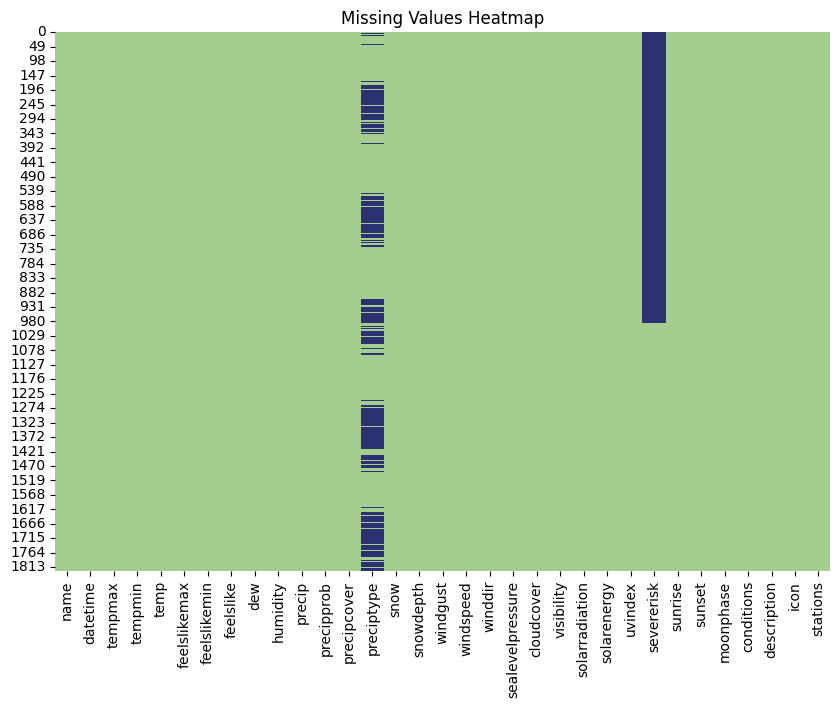

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))

sns.heatmap(df.isnull(), cbar = False, cmap = 'crest')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df['icon'].value_counts()

icon
rain                 1045
clear-day             396
partly-cloudy-day     382
fog                     2
wind                    1
cloudy                  1
Name: count, dtype: int64

In [ ]:
df['stations'].value_counts()

stations
VGHS,41922099999                                                                            565
VGHS,41941099999,41923099999,41929099999,41922099999,41939099999                            559
VGHS,41941099999,41923099999,41929099999,41922099999,41939099999,41909099999                388
VGHS,41941099999,41923099999,41929099999,41922099999                                         51
VGHS,41923099999,41922099999,41939099999                                                     49
VGHS,41923099999,41922099999                                                                 35
VGHS,remote,41922099999                                                                      32
VGHS,41941099999,41923099999,41929099999,remote,41922099999,41939099999                      22
VGHS,41941099999,41923099999,41929099999,remote,41922099999,41939099999,41909099999          20
VGHS,41923099999,41929099999,41922099999,41939099999                                         16
VGHS,41941099999,41923099999,41

In [ ]:
df['preciptype'].value_counts()

preciptype
rain    1045
Name: count, dtype: int64

In [ ]:
df['preciptype'] = df['preciptype'].fillna("not rain")
df['preciptype'].value_counts()

preciptype
rain        1045
not rain     782
Name: count, dtype: int64

In [ ]:
df['severerisk'] = df['severerisk'].fillna(0)
df['severerisk'].value_counts()

severerisk
0.0      985
10.0     490
30.0     232
60.0      60
75.0      47
100.0     11
5.0        2
Name: count, dtype: int64

In [ ]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,...,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,31.159278,23.489929,27.020744,35.590969,24.839847,29.858894,20.849042,70.508320,4.512042,57.197592,...,18.950082,199.404707,1008.451834,51.326875,3.739956,204.596223,17.668801,7.503558,10.998905,0.483399
std,3.781187,4.579141,3.954897,6.773910,6.002485,6.169479,4.136228,8.239601,9.499993,49.492781,...,11.937812,88.276657,5.392679,30.175569,0.621794,58.924790,5.097702,1.734377,18.533325,0.288721
min,17.000000,11.000000,14.000000,17.000000,11.000000,14.000000,8.700000,43.600000,0.000000,0.000000,...,1.200000,0.600000,991.800000,0.000000,0.800000,3.800000,0.200000,0.000000,0.000000,0.000000
25%,29.000000,20.000000,24.400000,30.000000,20.000000,24.550000,17.400000,65.300000,0.000000,0.000000,...,13.000000,137.700000,1003.900000,24.000000,3.600000,175.600000,15.200000,7.000000,0.000000,0.250000
50%,32.000000,25.100000,28.400000,37.300000,25.100000,31.500000,22.300000,70.300000,0.400000,100.000000,...,18.400000,186.200000,1008.700000,58.800000,4.000000,206.400000,17.800000,8.000000,0.000000,0.480000
75%,34.000000,27.000000,30.000000,40.750000,30.200000,35.100000,24.400000,76.050000,5.050000,100.000000,...,22.300000,285.750000,1013.100000,77.100000,4.100000,243.800000,21.000000,9.000000,10.000000,0.750000
max,40.300000,30.000000,33.800000,52.500000,38.700000,41.400000,26.700000,92.400000,156.000000,100.000000,...,244.800000,360.000000,1019.200000,100.000000,6.700000,335.900000,29.000000,10.000000,100.000000,0.980000


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format = "%d/%m/%Y")
df['datetime']

0      2019-05-01
1      2019-05-02
2      2019-05-03
3      2019-05-04
4      2019-05-05
          ...    
1822   2024-04-26
1823   2024-04-27
1824   2024-04-28
1825   2024-04-29
1826   2024-04-30
Name: datetime, Length: 1827, dtype: datetime64[ns]

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df.dtypes

name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                         int64
snowdepth                    int64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                 float64
sunrise                     object
sunset                      object
moonphase           

## **Year wise Temperature**

<ipython-input-16-4ac7f6b3fddc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['year'], y=df['temp'], palette = 'Spectral')


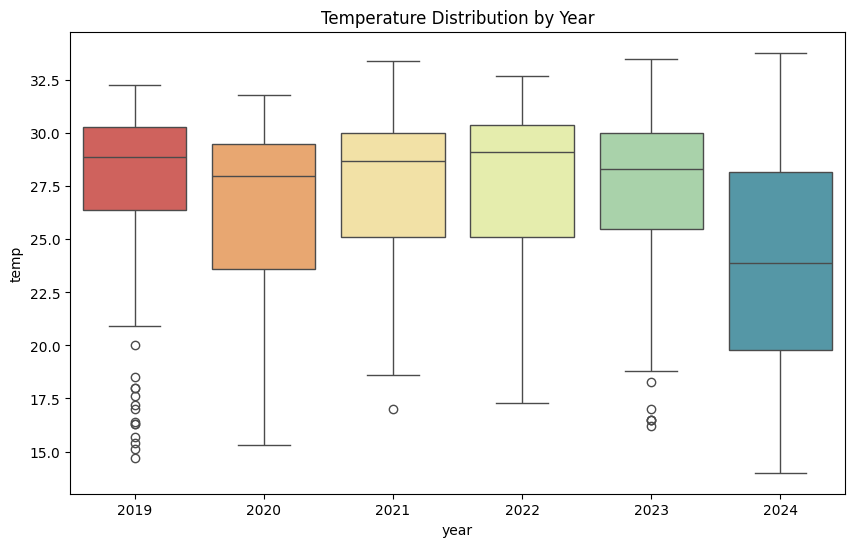

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x=df['year'], y=df['temp'], palette = 'Spectral')
plt.title('Temperature Distribution by Year')
plt.show()

## **Month wise Temperature**

<ipython-input-17-002bc7458166>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['month'], y = df['temp'], palette = 'Spectral')


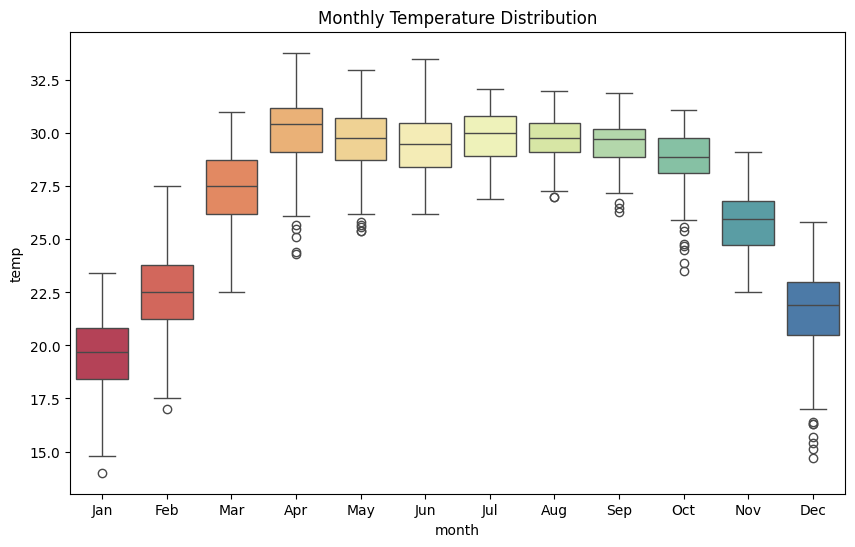

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = df['month'], y = df['temp'], palette = 'Spectral')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
ax.set_title('Monthly Temperature Distribution')
plt.show()

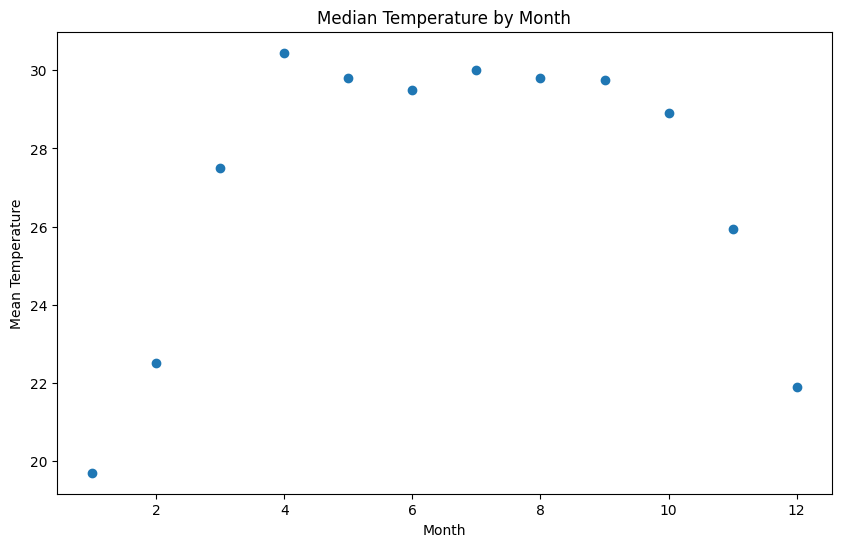

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
plt.scatter(df.groupby('month')['temp'].median().index, df.groupby('month')['temp'].median())
plt.title('Median Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.show()

## **Year wise Precipitation**

<ipython-input-19-3427a451f089>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['year'], y=df['precip'], palette = 'Spectral')


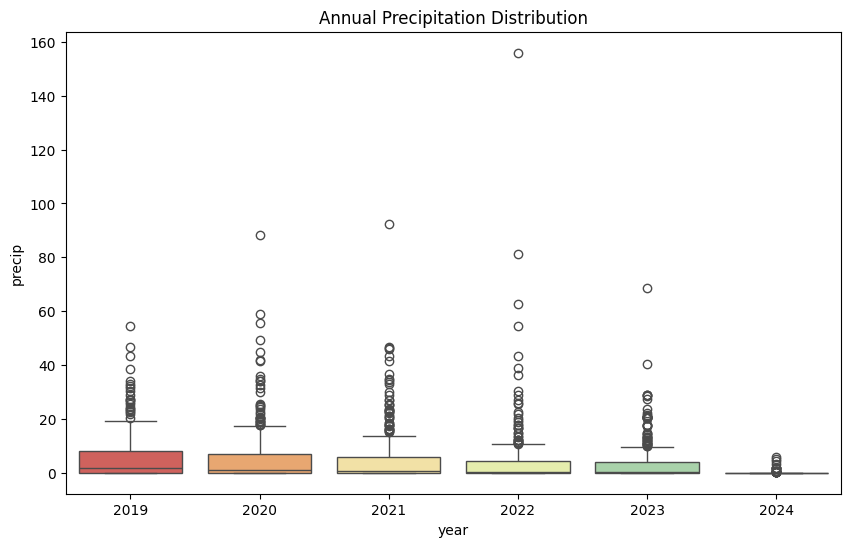

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x=df['year'], y=df['precip'], palette = 'Spectral')
ax.set_title('Annual Precipitation Distribution')
plt.show()

## **Month wise Precipitation**

<ipython-input-20-23c246930356>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['month'], y=df['precip'], palette = 'Spectral')


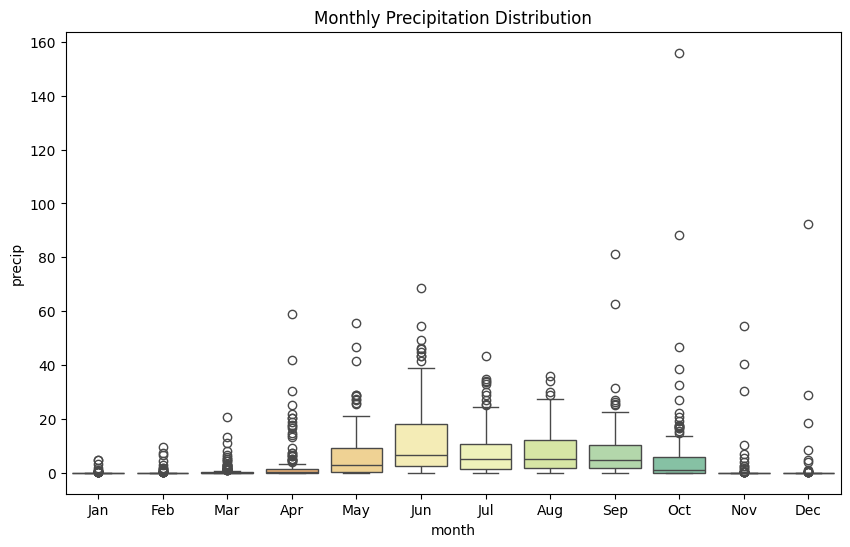

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x=df['month'], y=df['precip'], palette = 'Spectral')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
ax.set_title('Monthly Precipitation Distribution')
plt.show()

## **Visualization of Numerical Features**

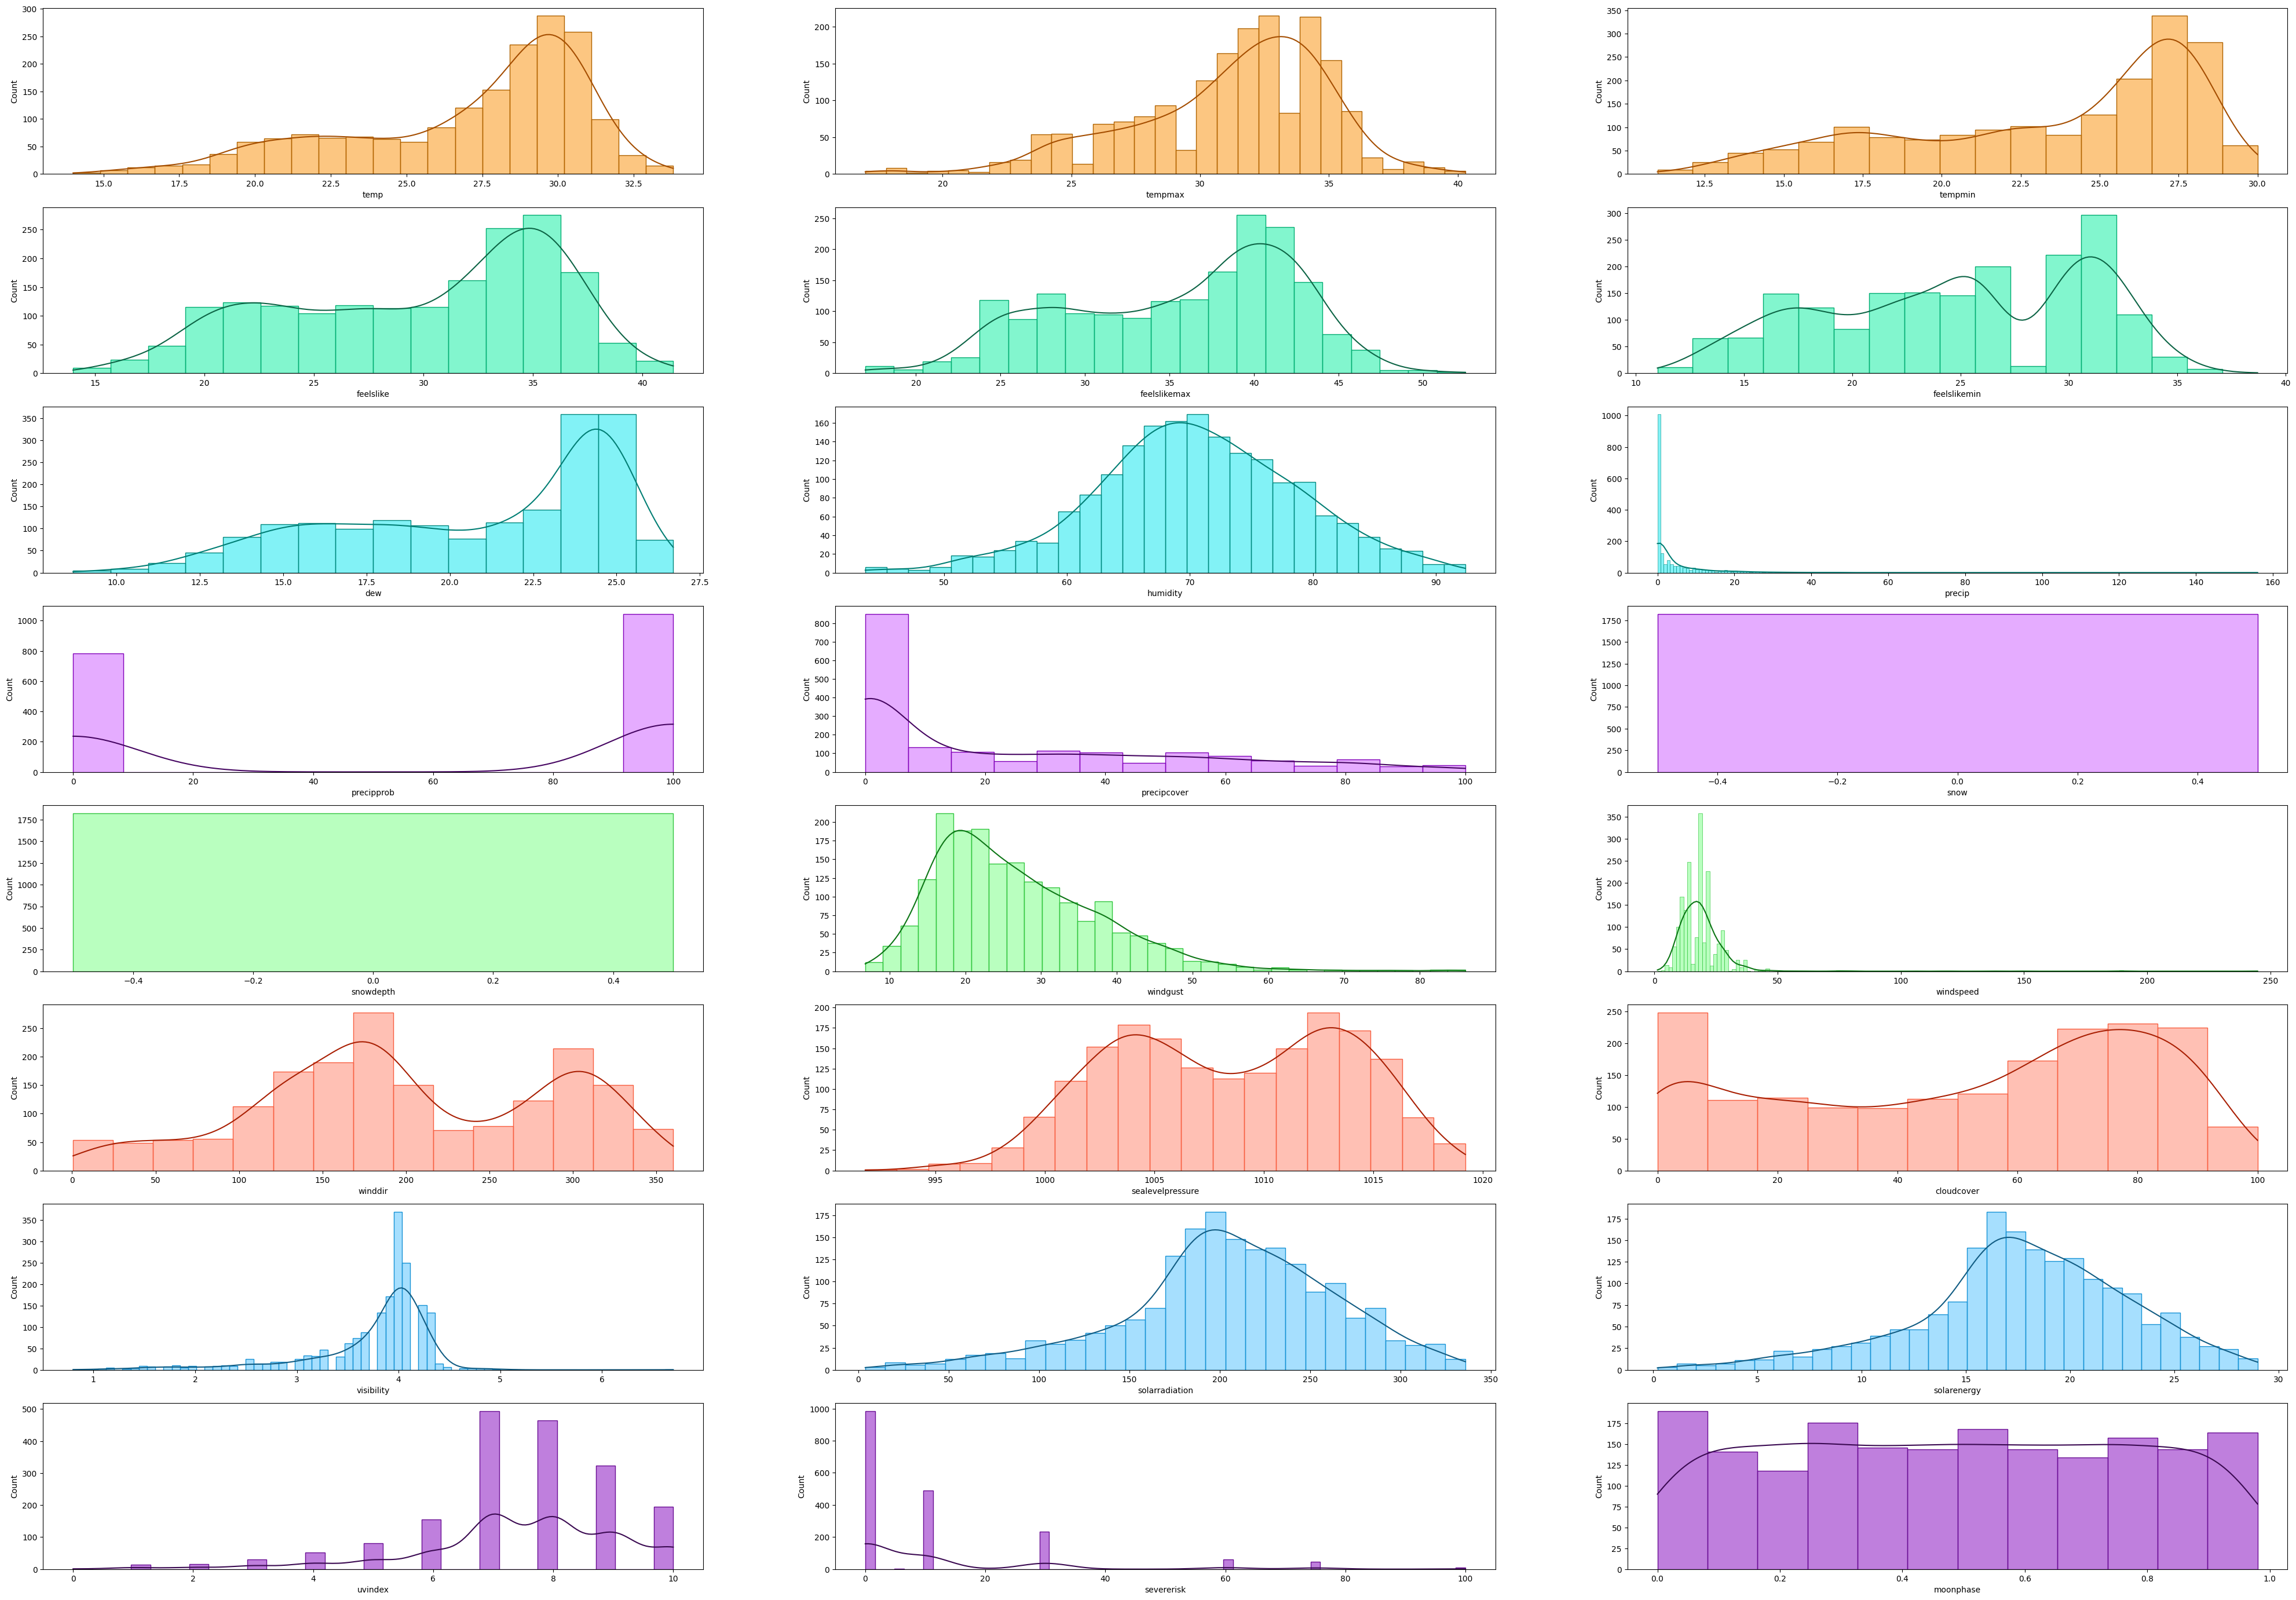

In [ ]:
fig, ax = plt.subplots(8, 3, figsize = (50,35))

sns.histplot(df['temp'], kde = True, color = '#FB8E04', edgecolor = '#AF6200', ax = ax[0][0])
ax[0, 0].lines[0].set_color('#A44D00')

sns.histplot(df['tempmax'], kde = True, color = '#FB8E04', edgecolor = '#AF6200', ax = ax[0][1])
ax[0, 1].lines[0].set_color('#A44D00')

sns.histplot(df['tempmin'], kde = True, color = '#FB8E04', edgecolor = '#AF6200', ax = ax[0][2])
ax[0, 2].lines[0].set_color('#A44D00')

sns.histplot(df['feelslike'], kde = True, color = '#07EF9E', edgecolor = '#02AC71', ax = ax[1][0])
ax[1, 0].lines[0].set_color('#0C6445')

sns.histplot(df['feelslikemax'], kde = True, color = '#07EF9E', edgecolor = '#02AC71', ax = ax[1][1])
ax[1, 1].lines[0].set_color('#0C6445')

sns.histplot(df['feelslikemin'], kde = True, color = '#07EF9E', edgecolor = '#02AC71', ax = ax[1][2])
ax[1, 2].lines[0].set_color('#0C6445')

sns.histplot(df['dew'], kde = True, color = '#07E7EE', edgecolor = '#00877D', ax = ax[2][0])
ax[2, 0].lines[0].set_color('#007E74')

sns.histplot(df['humidity'], kde = True, color = '#07E7EE', edgecolor = '#00877D', ax = ax[2][1])
ax[2, 1].lines[0].set_color('#007E74')

sns.histplot(df['precip'], kde = True, color = '#07E7EE', edgecolor = '#00877D', ax = ax[2][2])
ax[2, 2].lines[0].set_color('#007E74')

sns.histplot(df['precipprob'], kde = True, color = '#CD5AFF', edgecolor = '#8000B8', ax = ax[3][0])
ax[3, 0].lines[0].set_color('#450561')

sns.histplot(df['precipcover'], kde = True, color = '#CD5AFF', edgecolor = '#8000B8', ax = ax[3][1])
ax[3, 1].lines[0].set_color('#450561')

sns.histplot(df['snow'], kde = True, color = '#CD5AFF', edgecolor = '#8000B8', ax = ax[3][2])

sns.histplot(df['snowdepth'], kde = True, color = '#74FF80', edgecolor = '#31C53E', ax = ax[4][0])

sns.histplot(df['windgust'], kde = True, color = '#74FF80', edgecolor = '#31C53E', ax = ax[4][1])
ax[4, 1].lines[0].set_color('#0C7615')

sns.histplot(df['windspeed'], kde = True, color = '#74FF80', edgecolor = '#31C53E', ax = ax[4][2])
ax[4, 2].lines[0].set_color('#0C7615')

sns.histplot(df['winddir'], kde = True, color = '#FF836A', edgecolor = '#F85E3F', ax = ax[5][0])
ax[5, 0].lines[0].set_color('#A91F03')

sns.histplot(df['sealevelpressure'], kde = True, color = '#FF836A', edgecolor = '#F85E3F', ax = ax[5][1])
ax[5, 1].lines[0].set_color('#A91F03')

sns.histplot(df['cloudcover'], kde = True, color = '#FF836A', edgecolor = '#F85E3F', ax = ax[5][2])
ax[5, 2].lines[0].set_color('#A91F03')

sns.histplot(df['visibility'], kde = True, color = '#4FC1FE', edgecolor = '#1592D5', ax = ax[6][0])
ax[6, 0].lines[0].set_color('#115C83')

sns.histplot(df['solarradiation'], kde = True, color = '#4FC1FE', edgecolor = '#1592D5', ax = ax[6][1])
ax[6, 1].lines[0].set_color('#115C83')

sns.histplot(df['solarenergy'], kde = True, color = '#4FC1FE', edgecolor = '#1592D5', ax = ax[6][2])
ax[6, 2].lines[0].set_color('#115C83')

sns.histplot(df['uvindex'], kde = True, color = '#8101BD', edgecolor = '#690E93', ax = ax[7][0])
ax[7, 0].lines[0].set_color('#3A0951')

sns.histplot(df['severerisk'], kde = True, color = '#8101BD', edgecolor = '#690E93', ax = ax[7][1])
ax[7, 1].lines[0].set_color('#3A0951')

sns.histplot(df['moonphase'], kde = True, color = '#8101BD', edgecolor = '#690E93', ax = ax[7][2])
ax[7, 2].lines[0].set_color('#3A0951')

plt.show()

## **Visualization of Categorical Features**

<ipython-input-22-72333cca4c39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='icon',y='temp',data=df ,palette='YlGnBu', ax = ax[1])


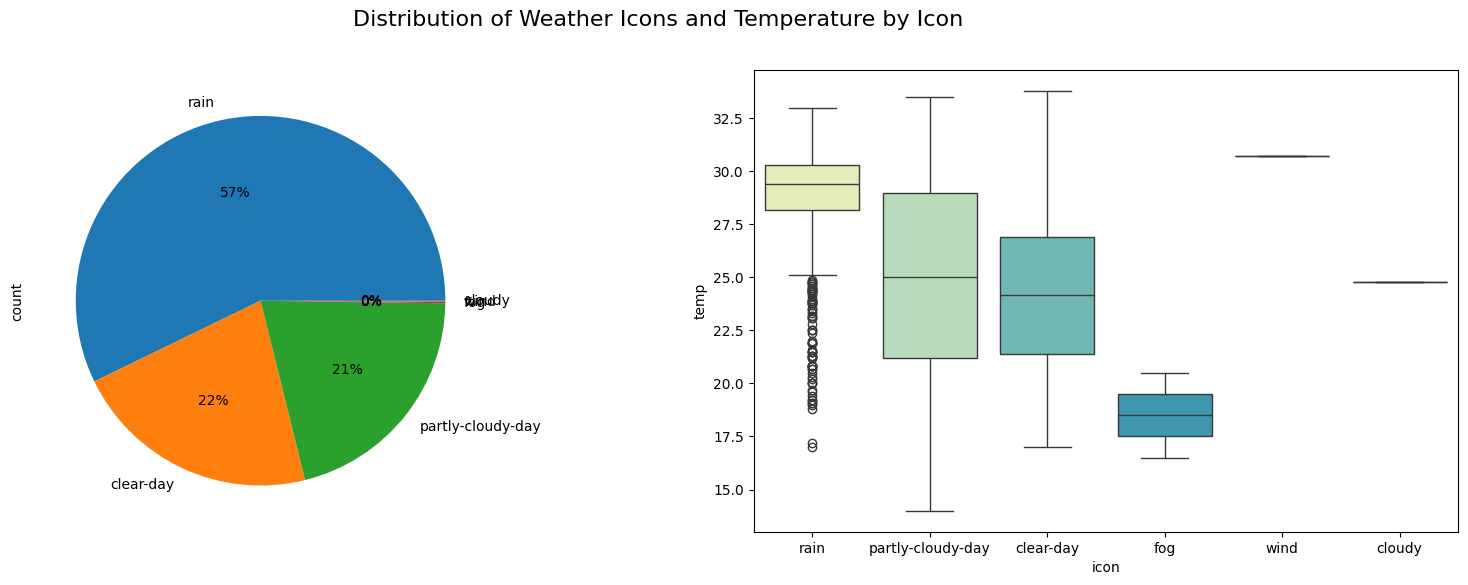

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))

df['icon'].value_counts().plot(kind = 'pie', autopct='%1.0f%%', ax = ax[0])

sns.boxplot(x='icon',y='temp',data=df ,palette='YlGnBu', ax = ax[1])
fig.suptitle('Distribution of Weather Icons and Temperature by Icon', fontsize=16)
plt.show()

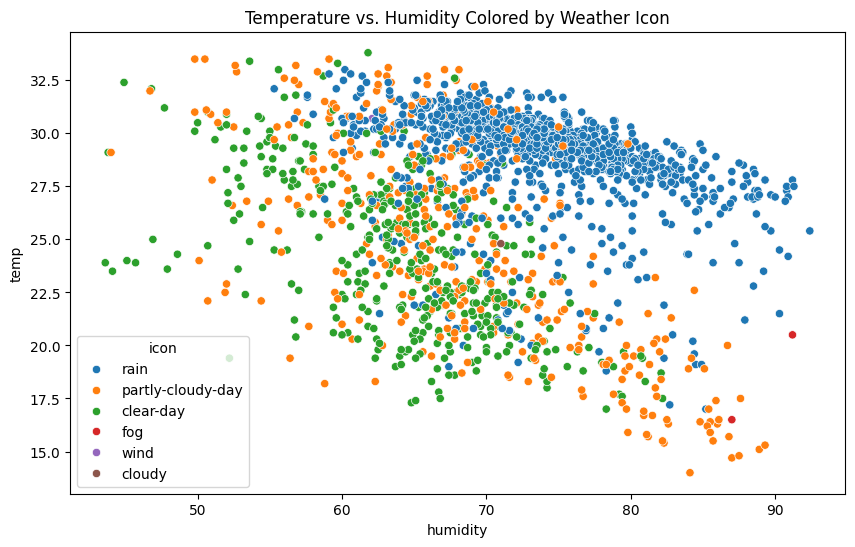

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x= 'humidity', y= 'temp', data=df, hue='icon')
plt.title('Temperature vs. Humidity Colored by Weather Icon')
plt.show()

# **Prediction Model of Temperature of Dhaka**

## **Copying Dataset**

In [ ]:
df_dhk_temp = df.copy()
df_dhk_temp = df_dhk_temp.drop(['name', 'datetime', 'snow', 'snowdepth', 'feelslike', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'precipprob', 'preciptype'], axis = 'columns')
df_dhk_temp['median_temp_month'] = df['month'].map(df.groupby('month')['temp'].median())

In [ ]:
df_dhk_temp.head()

,temp,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,...,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month,median_temp_month
0,31.7,22.8,61.0,1.5,20.83,45.4,27.7,189.1,1005.8,43.1,...,2019-05-01T05:24:54,2019-05-01T18:26:33,0.88,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"VGHS,41922099999",2019,5,29.8
1,31.5,23.4,63.7,0.4,16.67,32.8,22.3,181.6,1006.5,61.0,...,2019-05-02T05:24:12,2019-05-02T18:27:01,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"VGHS,41922099999",2019,5,29.8
2,28.3,24.8,81.4,28.8,70.83,32.4,29.5,115.7,1006.7,82.0,...,2019-05-03T05:23:31,2019-05-03T18:27:29,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"VGHS,41922099999",2019,5,29.8
3,25.4,23.5,89.7,27.4,75.00,84.6,40.7,187.6,1001.0,92.6,...,2019-05-04T05:22:51,2019-05-04T18:27:57,0.98,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"VGHS,41922099999",2019,5,29.8
4,29.2,22.3,68.1,0.0,0.00,28.4,22.3,195.7,1007.3,39.2,...,2019-05-05T05:22:12,2019-05-05T18:28:25,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VGHS,41922099999",2019,5,29.8


In [ ]:
df_dhk_temp.dtypes

temp                 float64
dew                  float64
humidity             float64
precip               float64
precipcover          float64
windgust             float64
windspeed            float64
winddir              float64
sealevelpressure     float64
cloudcover           float64
visibility           float64
solarradiation       float64
solarenergy          float64
uvindex                int64
severerisk           float64
sunrise               object
sunset                object
moonphase            float64
conditions            object
description           object
icon                  object
stations              object
year                   int32
month                  int32
median_temp_month    float64
dtype: object

In [ ]:
df_dhk_temp['sunrise'] = LabelEncoder().fit_transform(df_dhk_temp['sunrise'])
df_dhk_temp['sunset'] = LabelEncoder().fit_transform(df_dhk_temp['sunset'])
df_dhk_temp['icon'] = LabelEncoder().fit_transform(df_dhk_temp['icon'])
df_dhk_temp['conditions'] = LabelEncoder().fit_transform(df_dhk_temp['conditions'])
df_dhk_temp['stations'] = LabelEncoder().fit_transform(df_dhk_temp['stations'])
df_dhk_temp['description'] = LabelEncoder().fit_transform(df_dhk_temp['description'])

df_dhk_temp.head()

,temp,dew,humidity,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,...,sunrise,sunset,moonphase,conditions,description,icon,stations,year,month,median_temp_month
0,31.7,22.8,61.0,1.5,20.83,45.4,27.7,189.1,1005.8,43.1,...,0,0,0.88,5,29,4,2,2019,5,29.8
1,31.5,23.4,63.7,0.4,16.67,32.8,22.3,181.6,1006.5,61.0,...,1,1,0.91,5,29,4,2,2019,5,29.8
2,28.3,24.8,81.4,28.8,70.83,32.4,29.5,115.7,1006.7,82.0,...,2,2,0.95,5,23,4,2,2019,5,29.8
3,25.4,23.5,89.7,27.4,75.00,84.6,40.7,187.6,1001.0,92.6,...,3,3,0.98,4,16,4,2,2019,5,29.8
4,29.2,22.3,68.1,0.0,0.00,28.4,22.3,195.7,1007.3,39.2,...,4,4,0.00,2,31,3,2,2019,5,29.8


## **Correlation Heatmap**

<Axes: >

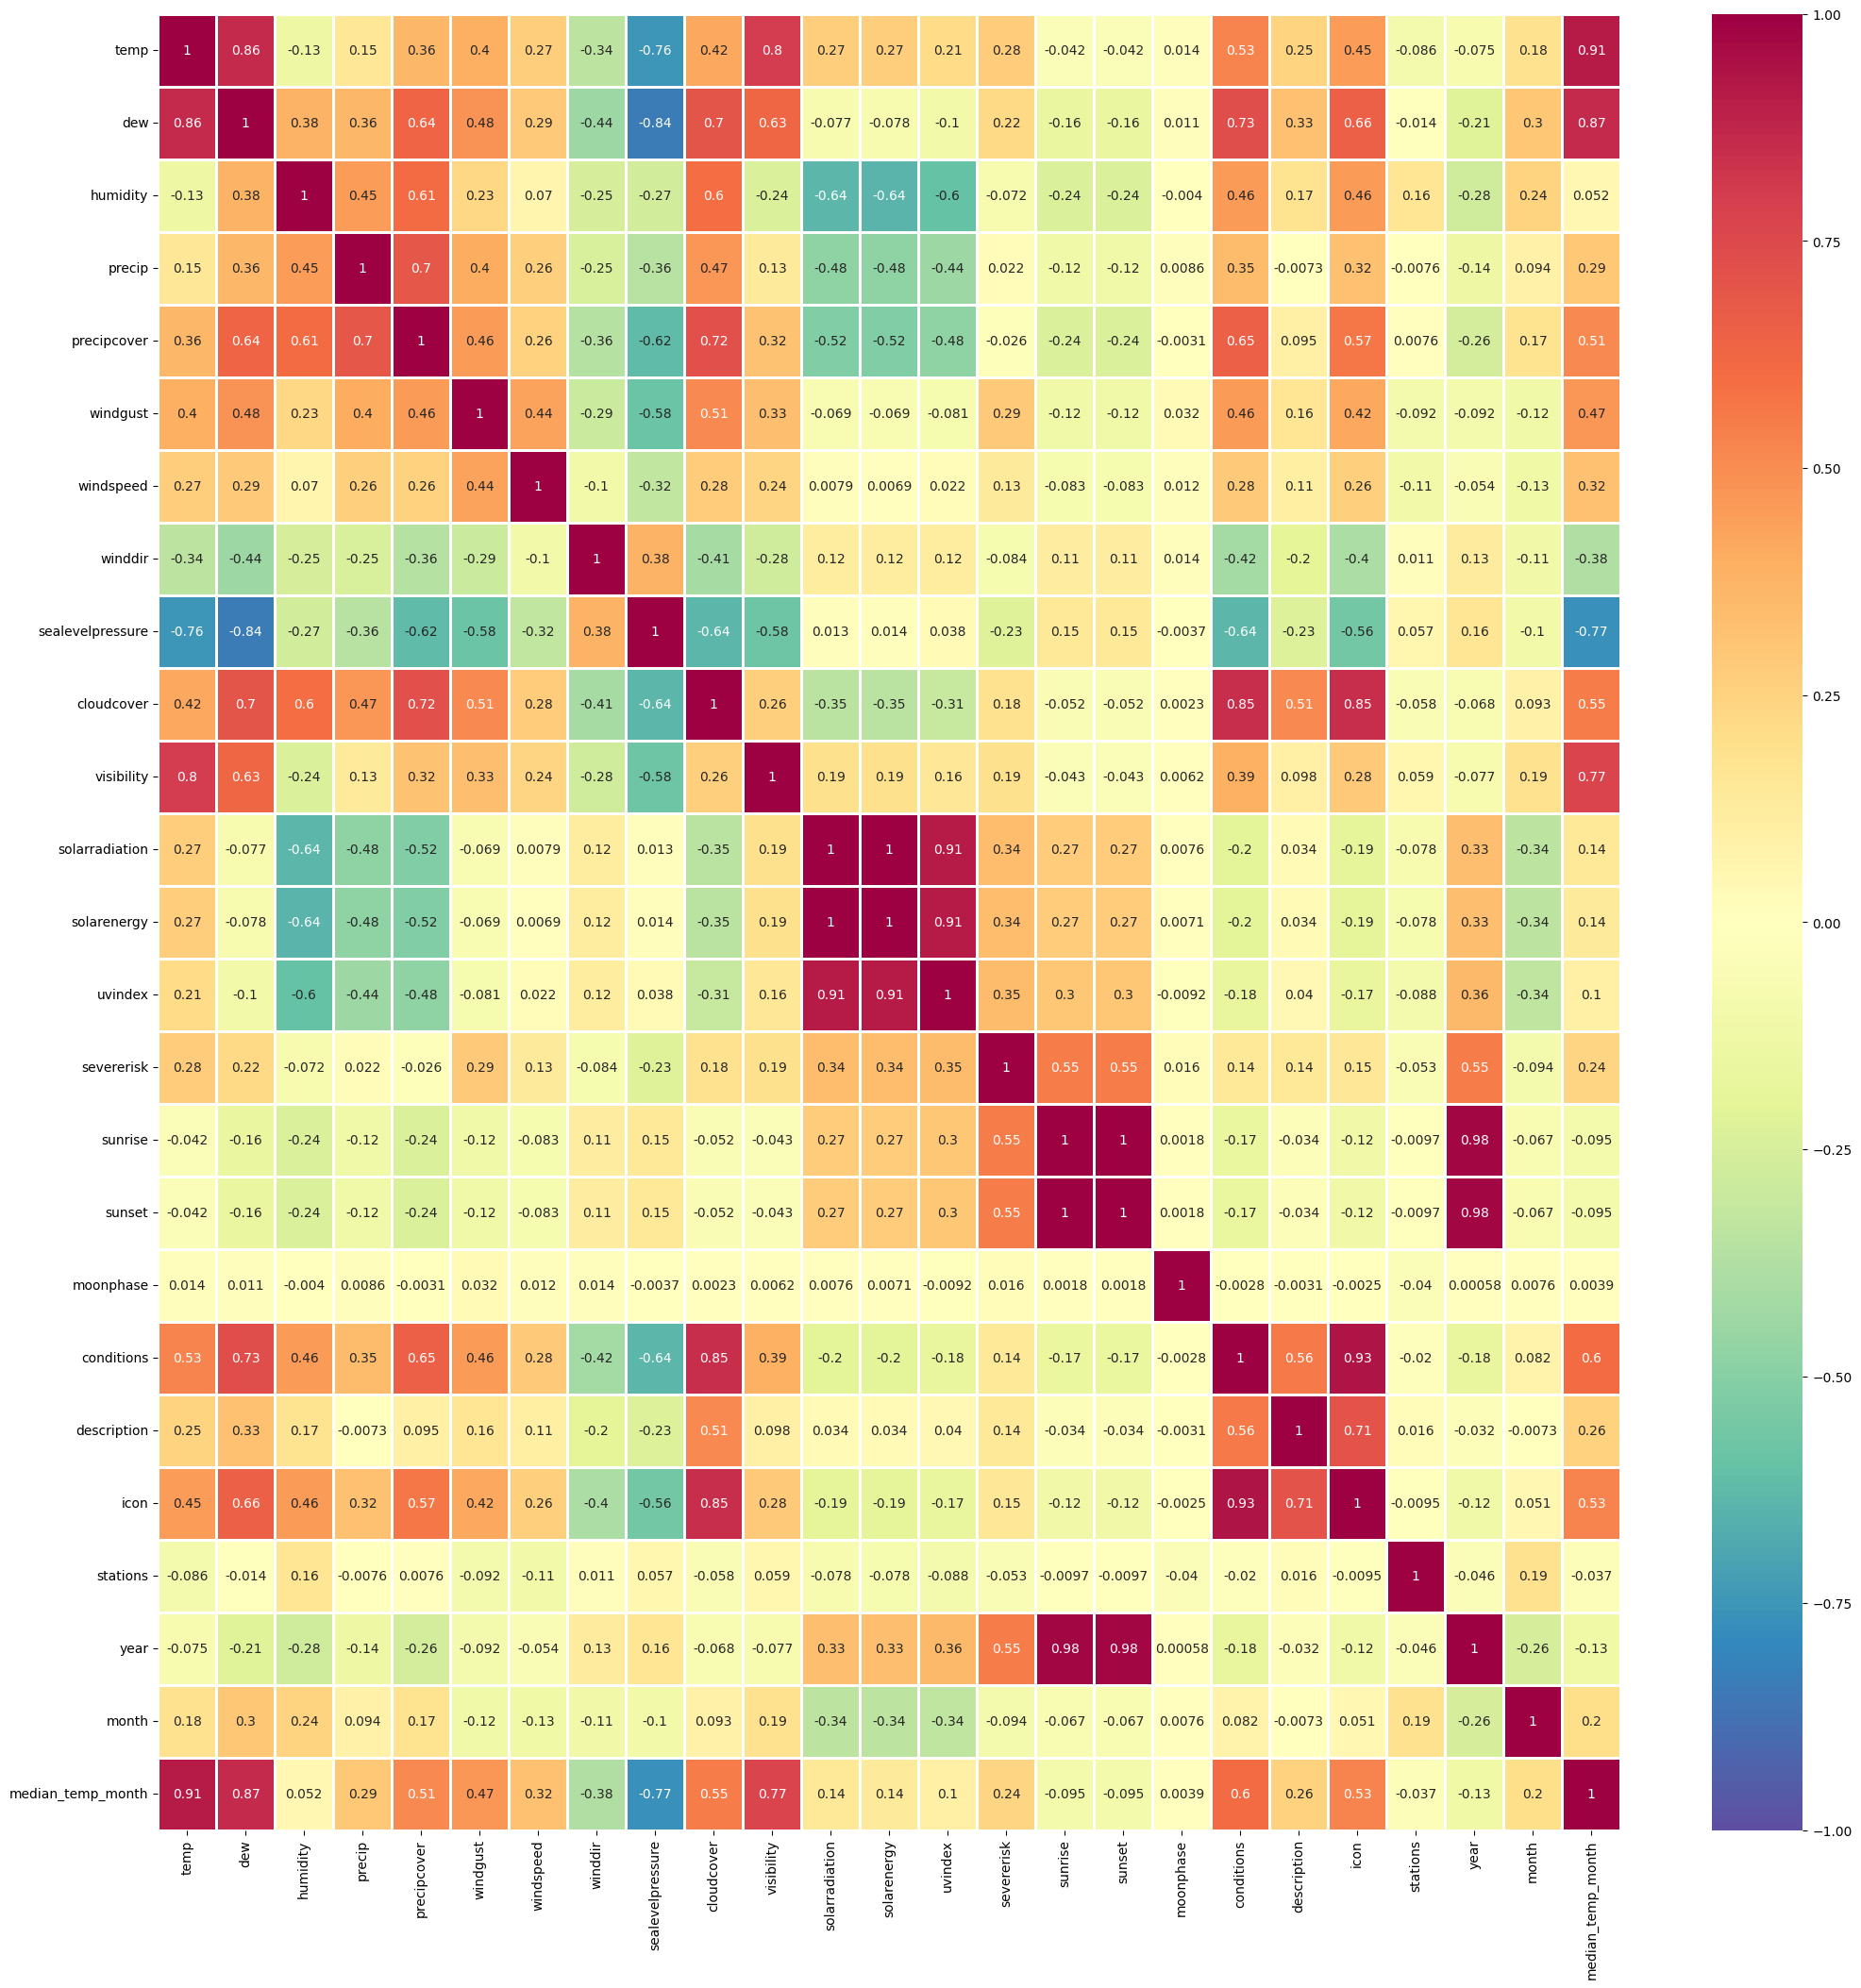

In [ ]:
fig, ax = plt.subplots(figsize = (25,25))

sns.heatmap(df_dhk_temp.corr(), annot=True, cmap='Spectral_r', vmin = -1, vmax = 1, linewidths=1)

## **Prediction Model By Taking the Correlation >= 0.4 and Correlation <= -0.4**

In [ ]:
correlation = df_dhk_temp.corr()['temp']
correlation

temp                 1.000000
dew                  0.862603
humidity            -0.133782
precip               0.153605
precipcover          0.363088
windgust             0.398402
windspeed            0.272708
winddir             -0.337267
sealevelpressure    -0.757084
cloudcover           0.420886
visibility           0.803676
solarradiation       0.269027
solarenergy          0.268868
uvindex              0.214539
severerisk           0.275339
sunrise             -0.042293
sunset              -0.042293
moonphase            0.014028
conditions           0.527406
description          0.249194
icon                 0.451034
stations            -0.086314
year                -0.075084
month                0.180871
median_temp_month    0.908545
Name: temp, dtype: float64

In [ ]:
drop_columns = correlation[abs(correlation) < 0.4].index.tolist()
drop_columns
df_temporary = df['month']
df_dhk_temp = df_dhk_temp.drop(columns = drop_columns)
df_dhk_temp['month'] = df_temporary

drop_columns

['humidity',
 'precip',
 'precipcover',
 'windgust',
 'windspeed',
 'winddir',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'severerisk',
 'sunrise',
 'sunset',
 'moonphase',
 'description',
 'stations',
 'year',
 'month']

In [ ]:
df_dhk_temp.dtypes

temp                 float64
dew                  float64
sealevelpressure     float64
cloudcover           float64
visibility           float64
conditions             int64
icon                   int64
median_temp_month    float64
month                  int32
dtype: object

In [ ]:
y = df_dhk_temp['temp']

In [ ]:
x = df_dhk_temp.drop('temp', axis = 'columns')
x.dtypes

dew                  float64
sealevelpressure     float64
cloudcover           float64
visibility           float64
conditions             int64
icon                   int64
median_temp_month    float64
month                  int32
dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intecept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intecept:  19.80256747687634
Coefficients:


[('dew', 0.5767815868966764),
 ('sealevelpressure', -0.018521022330550377),
 ('cloudcover', -0.03834402390942137),
 ('visibility', 1.4476812739939855),
 ('conditions', -0.2621834629433915),
 ('icon', 0.4092670223922891),
 ('median_temp_month', 0.3985814839612742),
 ('month', -0.11274584083754104)]

In [ ]:
y_pred_mlr = mlr.predict(x_test)
y_pred_mlr

array([29.86964852, 29.6444542 , 24.53156516, 31.75854125, 20.56411732,
       31.07596321, 29.39600257, 22.54964126, 30.7886981 , 29.73469242,
       29.21362105, 28.60481483, 28.87564384, 24.75066812, 30.02206017,
       31.23414191, 29.37200187, 19.92716926, 30.81641947, 25.12017483,
       27.38313129, 28.28921612, 29.99899486, 27.26906265, 28.41537838,
       26.06454138, 28.41006821, 29.70446581, 23.76349611, 25.70447832,
       29.46069867, 26.44607159, 29.50174999, 28.55668702, 30.12029808,
       29.97204842, 28.75219176, 26.06223813, 29.47805473, 29.82410418,
       21.25605201, 29.54062101, 19.13289995, 28.57602583, 26.83450874,
       29.01061958, 29.13439569, 21.71021785, 20.41255141, 29.58734957,
       28.50856487, 25.6582121 , 20.42569245, 29.227085  , 27.66995893,
       19.99473937, 25.88644024, 30.64549883, 28.09289727, 32.34495141,
       23.45064678, 26.18687639, 26.53794393, 25.92583073, 27.41688005,
       30.34273028, 29.94929354, 29.36318327, 29.89105214, 28.60

In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value' : y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
414,28.4,29.869649
509,28.9,29.644454
571,23.6,24.531565
28,31.6,31.758541
1681,21.2,20.564117


In [ ]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(meanSqErr)
print('R squared : {:.6f}'. format(mlr.score(x, y)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared : 0.917392
Mean Absolute Error: 0.8776077358686923
Mean Square Error: 1.2066654479155094
Root Mean Square Error: 1.0984832488096983


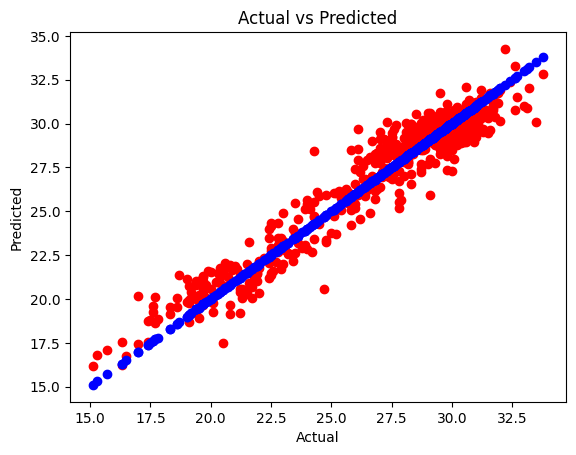

In [ ]:
plt.scatter(y_test, y_pred_mlr, color='red')
plt.scatter(y_test, y_test, color='blue')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# **Prediction Model of Precipitation of Dhaka**

## **Copying Dataset**

In [ ]:
df_dhk_rain = df.copy()
df_dhk_rain = df_dhk_rain.drop(['name', 'datetime', 'snow', 'snowdepth', 'preciptype', 'precipprob', 'conditions', 'description', 'icon'], axis = 'columns')
df_dhk_rain['median_precip_month'] = df['month'].map(df.groupby('month')['precip'].median())

In [ ]:
df_dhk_rain.dtypes

tempmax                float64
tempmin                float64
temp                   float64
feelslikemax           float64
feelslikemin           float64
feelslike              float64
dew                    float64
humidity               float64
precip                 float64
precipcover            float64
windgust               float64
windspeed              float64
winddir                float64
sealevelpressure       float64
cloudcover             float64
visibility             float64
solarradiation         float64
solarenergy            float64
uvindex                  int64
severerisk             float64
sunrise                 object
sunset                  object
moonphase              float64
stations                object
year                     int32
month                    int32
median_precip_month    float64
dtype: object

In [ ]:
df_dhk_rain.shape

(1827, 27)

In [ ]:
df_dhk_rain['sunrise'] = LabelEncoder().fit_transform(df_dhk_rain['sunrise'])
df_dhk_rain['sunset'] = LabelEncoder().fit_transform(df_dhk_rain['sunset'])
df_dhk_rain['stations'] = LabelEncoder().fit_transform(df_dhk_rain['stations'])
df_dhk_rain.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,stations,year,month,median_precip_month
0,36.0,28.0,31.7,39.8,31.3,36.1,22.8,61.0,1.5,20.83,...,21.3,8,0.0,0,0,0.88,2,2019,5,2.9
1,35.0,29.0,31.5,40.6,34.2,36.4,23.4,63.7,0.4,16.67,...,18.5,7,0.0,1,1,0.91,2,2019,5,2.9
2,32.0,25.0,28.3,42.4,25.0,33.0,24.8,81.4,28.8,70.83,...,9.1,4,0.0,2,2,0.95,2,2019,5,2.9
3,28.0,24.0,25.4,33.6,24.0,25.8,23.5,89.7,27.4,75.00,...,5.6,3,0.0,3,3,0.98,2,2019,5,2.9
4,34.0,24.0,29.2,37.3,24.0,31.8,22.3,68.1,0.0,0.00,...,25.4,10,0.0,4,4,0.00,2,2019,5,2.9


## **Correlation Heatmap**

<Axes: >

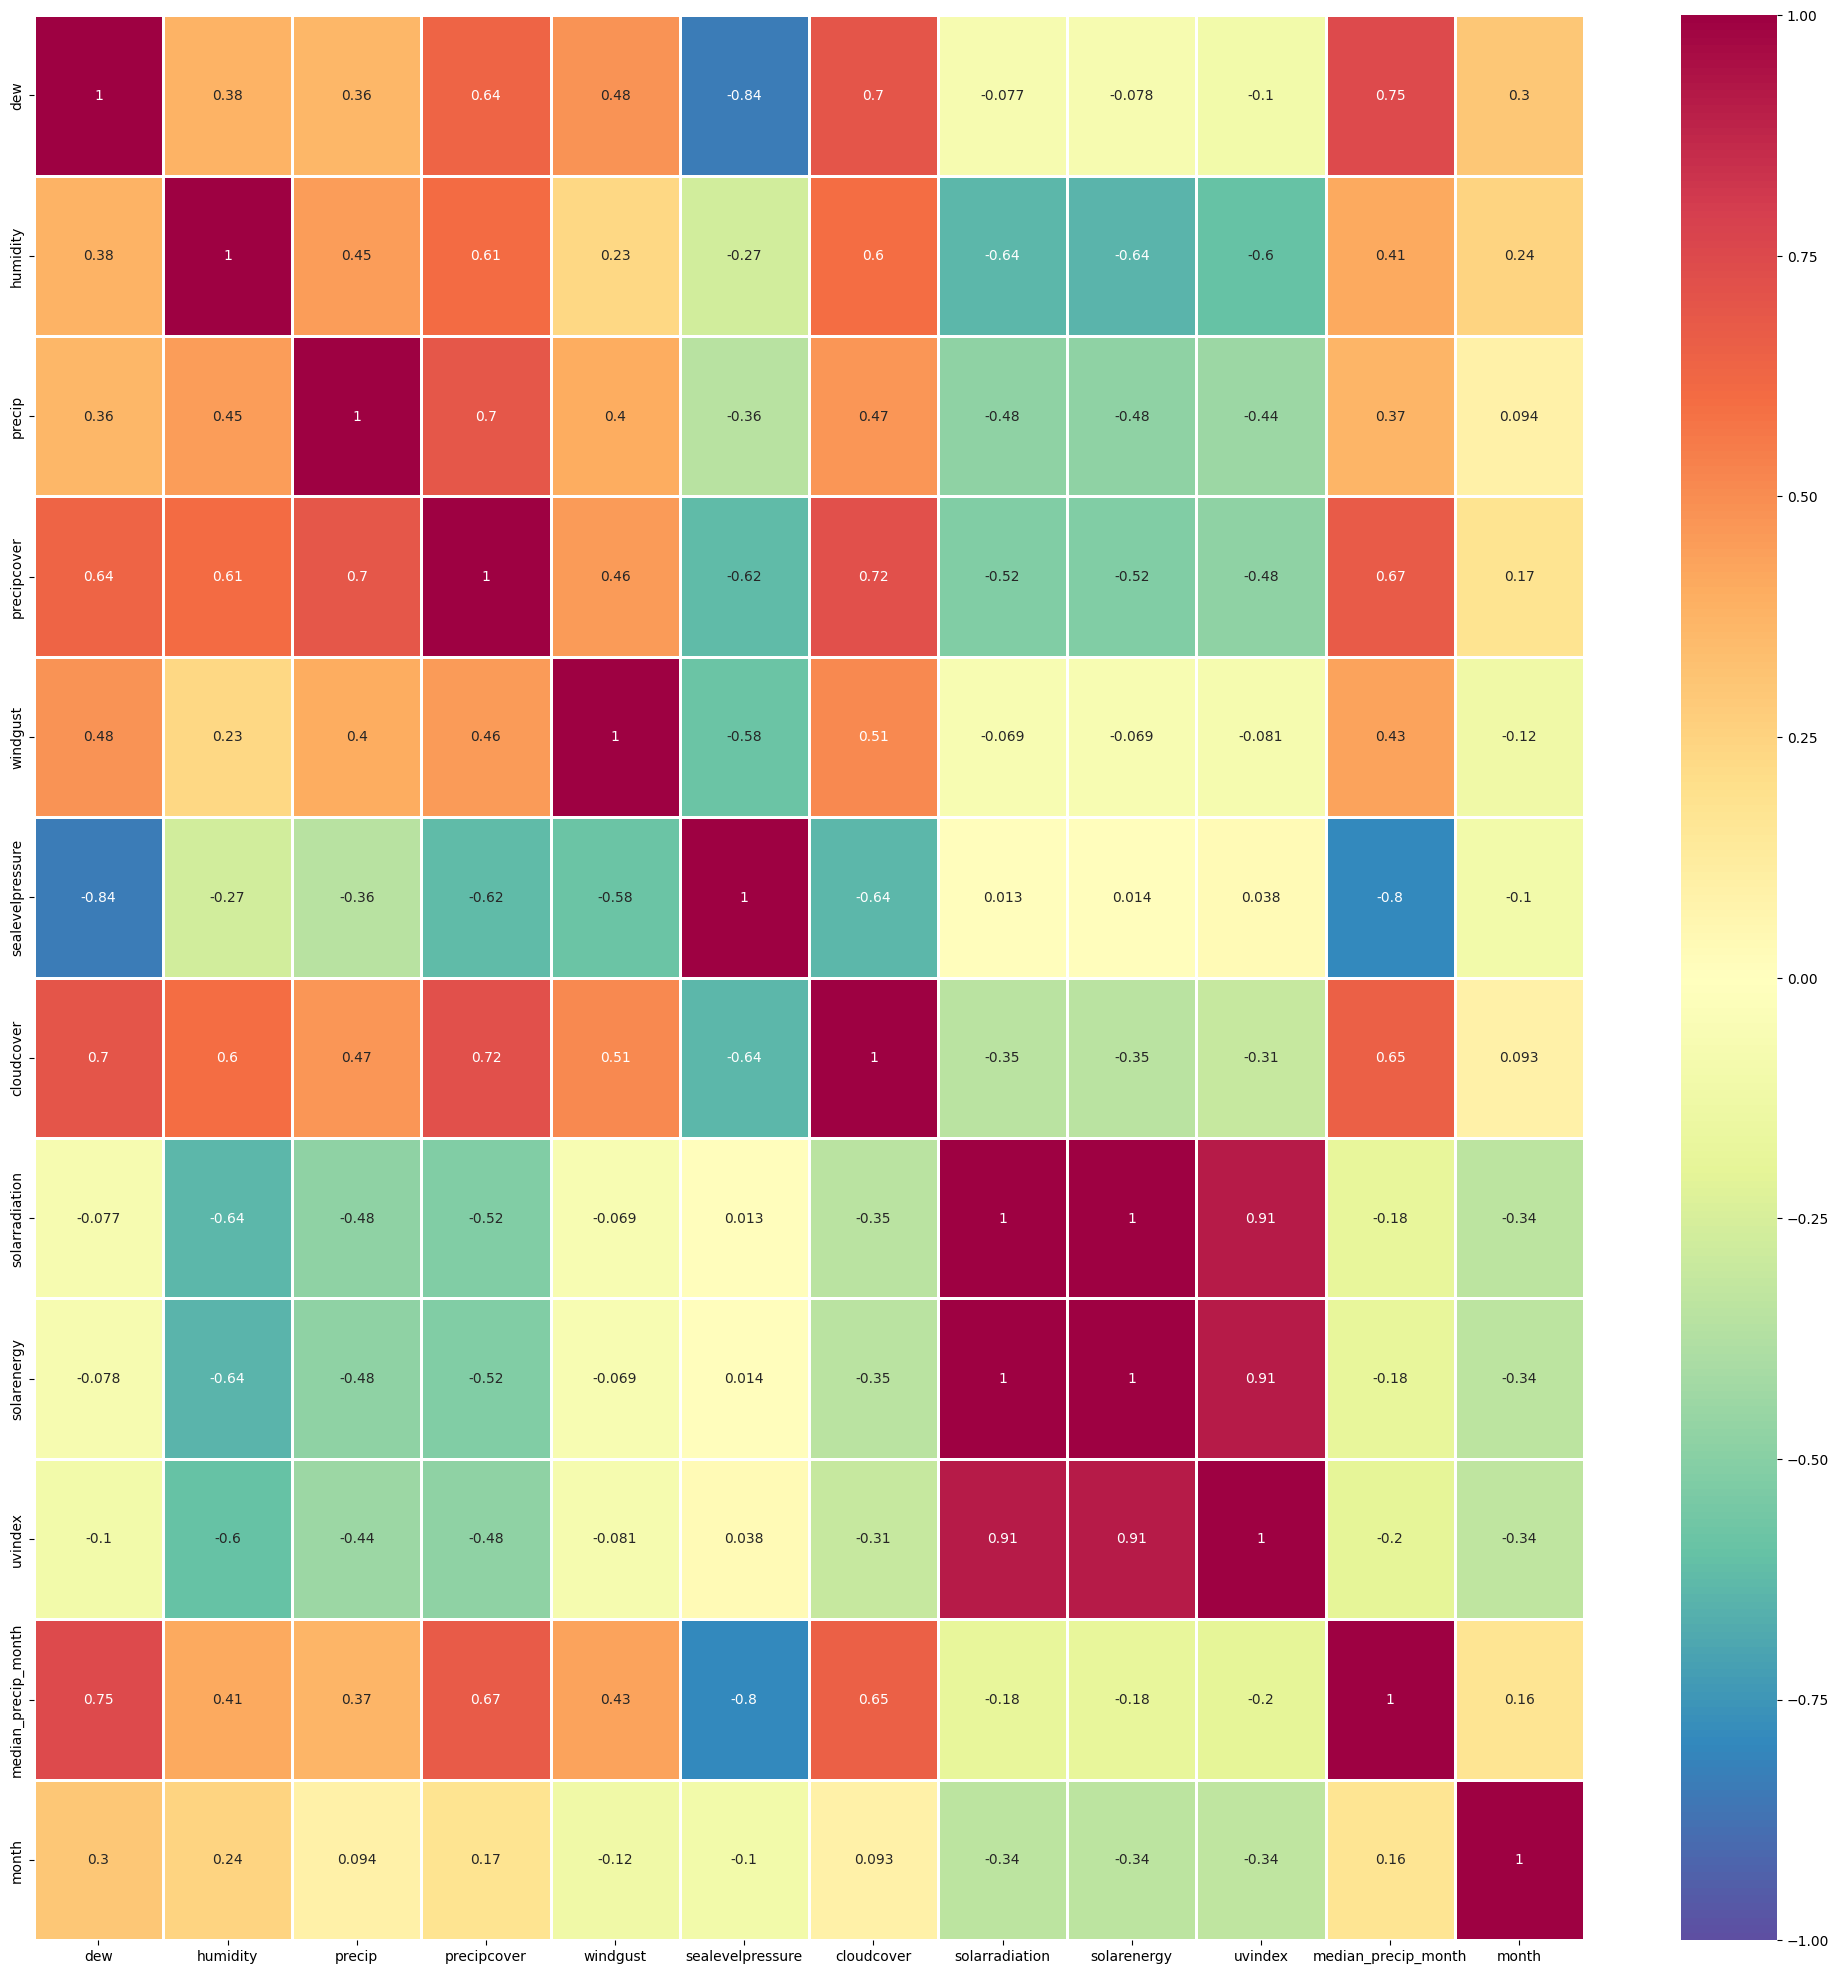

In [ ]:
fig, ax = plt.subplots(figsize = (25,25))

sns.heatmap(df_dhk_rain.corr(), annot=True, cmap='Spectral_r', vmin = -1, vmax = 1, linewidths=1)

## **Prediction Model By Taking the Correlation >= 0.3 and Correlation <= -0.3**

In [ ]:
correlation = df_dhk_rain.corr()['precip']
correlation

dew                    0.362343
humidity               0.453113
precip                 1.000000
precipcover            0.695079
windgust               0.399555
sealevelpressure      -0.356380
cloudcover             0.470992
solarradiation        -0.478635
solarenergy           -0.479175
uvindex               -0.439529
median_precip_month    0.373152
month                  0.093714
Name: precip, dtype: float64

In [ ]:
drop_columns = correlation[abs(correlation) < 0.3].index.tolist()
drop_columns
df_temporary = df['month']
df_dhk_rain = df_dhk_rain.drop(columns = drop_columns)
df_dhk_rain['month'] = df_temporary

In [ ]:
y = df_dhk_rain['precip']

In [ ]:
x = df_dhk_rain.drop('precip', axis = 'columns')

In [ ]:
x.dtypes

dew                    float64
humidity               float64
precipcover            float64
windgust               float64
sealevelpressure       float64
cloudcover             float64
solarradiation         float64
solarenergy            float64
uvindex                  int64
median_precip_month    float64
month                    int32
dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intecept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intecept:  -29.857183479718856
Coefficients:


[('dew', 0.04539111444859756),
 ('humidity', -0.0073168544835682525),
 ('precipcover', 0.22132522524398407),
 ('windgust', 0.08567014229779005),
 ('sealevelpressure', 0.03203772411128546),
 ('cloudcover', -0.022037808387184457),
 ('solarradiation', -0.019033320195655616),
 ('solarenergy', -0.1598962063997704),
 ('uvindex', 0.44446143451210973),
 ('median_precip_month', -0.3777524006130376),
 ('month', -0.12817723338146914)]

In [ ]:
y_pred_mlr = mlr.predict(x_test)
y_pred_mlr

array([ 1.73779150e+01,  1.88755920e+01, -1.67248219e-01, -5.80690724e-01,
        1.77319986e+01, -9.83149076e-02,  3.83626275e+00, -1.21004604e+00,
        4.04658863e+00,  6.81664797e+00,  1.58520908e+01,  2.07599580e+01,
        8.84701316e+00, -1.76849219e+00,  9.43975161e+00, -5.61242944e-01,
        4.97147149e+00,  1.52148756e-01,  7.42126205e+00,  2.68126884e+01,
       -1.35725908e+00,  6.23476229e+00, -8.37608184e-02,  7.55491424e+00,
        3.18655025e+00, -1.35218375e-01,  7.81342606e+00,  2.03135733e+00,
       -3.57294442e-01,  4.85045700e-02,  1.09779736e+01, -1.80578057e+00,
        1.22568178e+01,  1.95473265e+01,  2.25391595e-01,  3.77956264e-01,
        4.88752591e+00, -3.20065965e-01,  3.58931003e+00,  1.58986292e+01,
        6.32444249e-01,  1.31426980e+01,  1.62762759e+00,  2.66688988e-01,
       -4.22841005e-01,  1.18171319e+01,  1.50884423e+00, -9.73671021e-01,
       -2.20862376e-01,  2.03800924e+00,  9.30498103e+00, -3.42487593e-01,
       -4.76789457e-01,  

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(meanSqErr)
print('R squared : {:.6f}'. format(mlr.score(x, y)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared : 0.525511
Mean Absolute Error: 3.4455638735784815
Mean Square Error: 76.61155456916929
Root Mean Square Error: 8.752802669383636


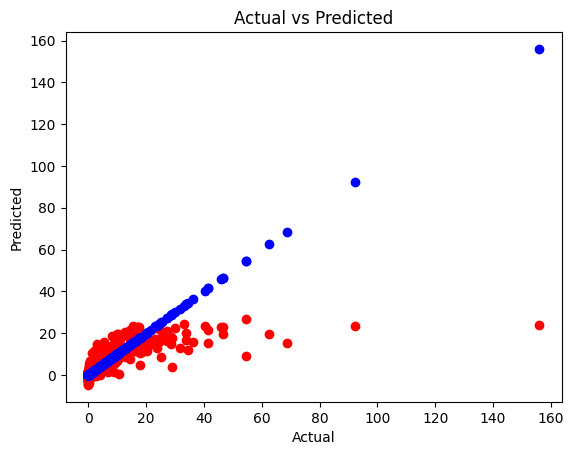

In [ ]:
plt.scatter(y_test, y_pred_mlr, color='red')
plt.scatter(y_test, y_test, color='blue')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()